Football
results.csv includes the following columns:
date - date of the match
home_team - the name of the home team
away_team - the name of the away team
home_score - full-time home team score including extra time, not including penalty-shootouts away_score
full-time away team score including extra time, not including penalty-shootouts tournament
the name of the tournament city
the name of the city/town/administrative unit where the match was played country
the name of the country where the match was played neutral
TRUE/FALSE column indicating whether the match was played at a neutral venue

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False


Number of Tuples: 42650
Number of Tournaments: 120
Number of Matches in 2018: 908
home_team_outcome
Win     20739
Loss    12074
Tie      9837
Name: count, dtype: int64


<Axes: title={'center': 'Matches Played on Neutral Ground'}, ylabel='count'>

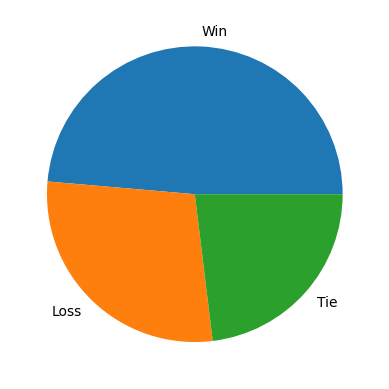

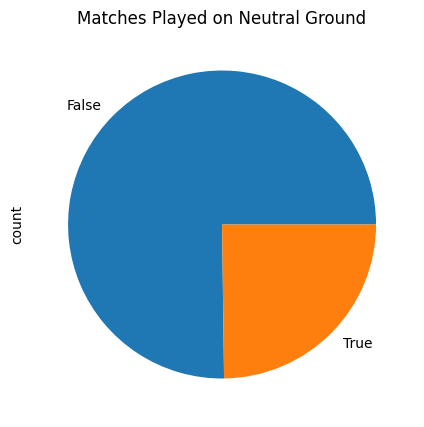

In [30]:
# Step 1 - download and read the dataset into a Pandas data frame.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

dataset_orig = pd.read_csv('results.csv')
display(dataset_orig.head(4))

# Step 2 - Drop rows with missing values, DataFrame with NA entries dropped from it or None if
dataset= dataset_orig.dropna().copy()

# Step 3 - Explore the Dataset
# How many tuples are there in the dataset?  () is tuple, [] is list.
number_of_tuples = len(dataset)
print("Number of Tuples:", number_of_tuples)
# How many tournaments are there in the dataset
num_of_tournaments = dataset['tournament'].nunique()
print('Number of Tournaments:', num_of_tournaments)

# Step 4 - Convert and Deduce
# Convert column date to timestamp using pd.to_datetime()
dataset['date'] = pd.to_datetime(dataset['date'])
#print ('Data types after date column conversion: ', dataset.info())
# Find out how many matches in the dataset were played in 2018.
matches_2018 = dataset[dataset['date'].dt.year == 2018]  #Filter dataset date to matches in 2018
num_matches_in_2018 = len(matches_2018)  # Count with len number of items
print ('Number of Matches in 2018:', num_matches_in_2018)

# Step 5 -- Team Statistics. Calculate how many times the home team won, lost, or had a draw.
dataset['score_diff'] = dataset['home_score'] - dataset['away_score']  #Calculates wins, losses, or ties with +, -, or =
#outputs conditions comparing score_diff to 0. >0 is a Win, >0 is a Loss, and == is a tie
conditions = [
    (dataset['score_diff'] >0), 
    (dataset['score_diff'] <0),
    (dataset['score_diff'] ==0)
]
outcomes = ['Win', 'Loss', 'Tie']

dataset['home_team_outcome'] = np.select(conditions, outcomes, default="Unknown")  

outcome_counts = dataset['home_team_outcome'].value_counts()
print(outcome_counts)


# Step 6 -- Visualization. Plot the numbers extracted from step 5 in a pie chart. Win, Loss, Tie = ref mathplotlib website
labels = 'Win', 'Loss', 'Tie'
sizes = outcome_counts
fig, ax = plt.subplots()
ax.pie(sizes, labels=labels)
# Plot the neutral column as a pie chart.
plt.figure(figsize=(5,5))
dataset['neutral'].value_counts().plot.pie(title='Matches Played on Neutral Ground')